Data Visualization

Code for Assignment 6 - GGE 6505 
Group 10

In [6]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import pylab
import numpy as np
%matplotlib inline
import pandas as pd


In [5]:
df = pd.read_csv("clean_data.csv")

Histogram of each affected group of people by age 

In [6]:
#Grouping the data by Diagnosis 
groups = df.groupby('diagnosis')

#create Histogram for Each group of diagnosis


for i, (name, group) in enumerate(groups):
    plt.figure()
    fig = plt.hist(group['age'])
    plt.xlabel('Age')
    plt.ylabel('Frequency of '+ name)
    plt.title('Histogram of Age - '+name)
    

NameError: name 'plt' is not defined

The above histogram shows that the COPD is more common in age group between 65-80

Box Plot

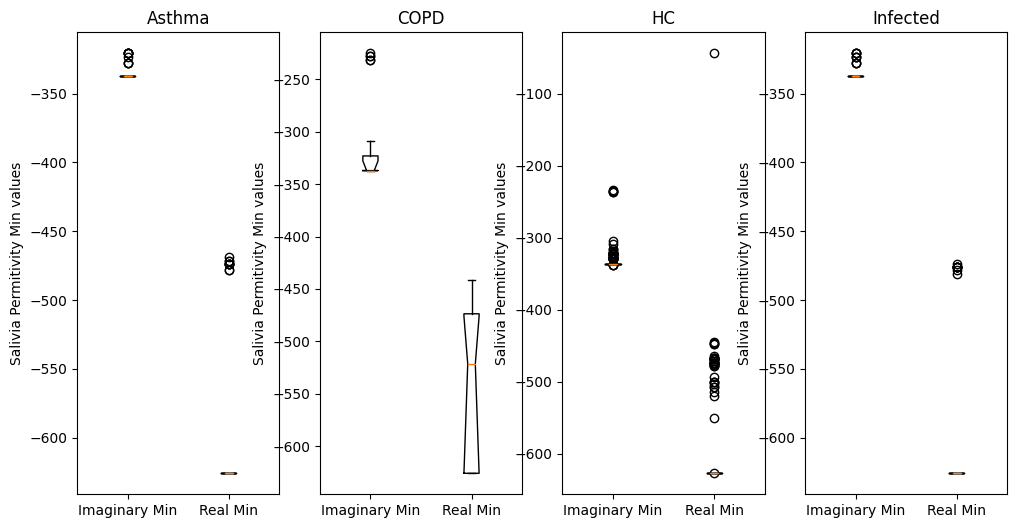

In [40]:
#create new Box plots comparing Real and Imaginary minimum values in Salvia Permittivity data

fig, axs = plt.subplots(nrows=1, ncols=len(groups), figsize=(12,6))
for i, (name, group) in enumerate(groups):
    axs[i].boxplot([group['imaginary_min'],group['real_min']], labels=['Imaginary Min', 'Real Min'], notch=True, bootstrap=10000)
    axs[i].set_ylabel('Salivia Permitivity Min values')
    axs[i].set_title(name)
    

In [7]:
import pandas as pd
import statsmodels.api as sm
import numpy as np


# Identify outliers in each group using linear regression
threshold = 3
outliers = []
groups=df.groupby('diagnosis')
for name, group in groups:
    # Create linear regression model
    X = group[['real_min']]
    y = group['imaginary_min']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Predict values and calculate residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Identify outliers based on threshold
    group_outliers = group[np.abs(residuals) > threshold * residuals.std()]
    outliers.append(group_outliers)

# Remove outliers from each group
df_clean = df.copy()
for group_outliers in outliers:
    df_clean = df_clean.drop(group_outliers.index)

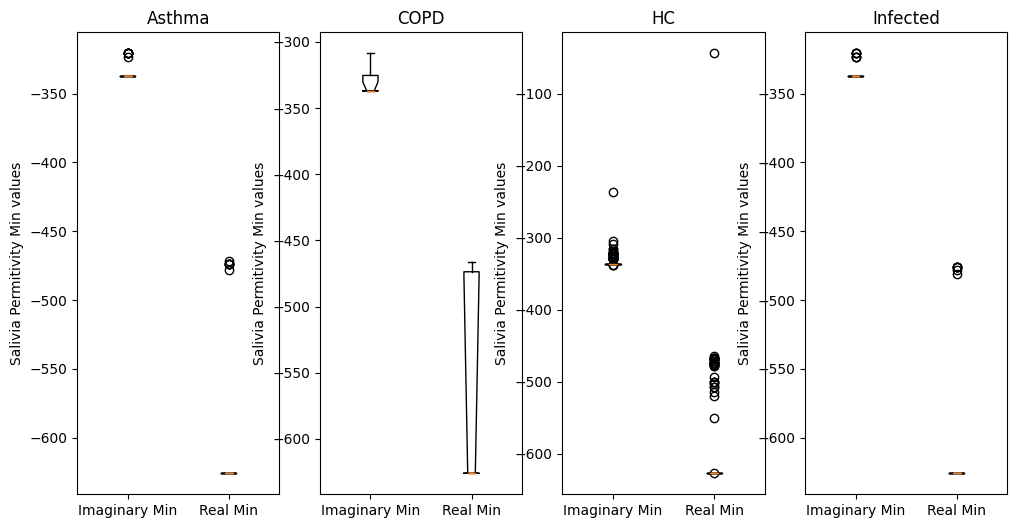

In [12]:
group2=df_clean.groupby('diagnosis')
fig, axs = plt.subplots(nrows=1, ncols=len(group2), figsize=(12,6))
for i, (name, group) in enumerate(group2):
    axs[i].boxplot([group['imaginary_min'],group['real_min']], labels=['Imaginary Min', 'Real Min'], notch=True, bootstrap=10000)
    axs[i].set_ylabel('Salivia Permitivity Min values')
    axs[i].set_title(name)

In [13]:
import pandas as pd
import statsmodels.api as sm
import numpy as np


# Identify outliers in each group using linear regression
threshold = 3
outliers = []
group3=df_clean.groupby('diagnosis')
for name, group in group3:
    # Create linear regression model
    X = group[['real_min']]
    y = group['imaginary_min']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Predict values and calculate residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Identify outliers based on threshold
    group_outliers = group[np.abs(residuals) > threshold * residuals.std()]
    outliers.append(group_outliers)

# Remove outliers from each group
df_clean_final = df_clean.copy()
for group_outliers in outliers:
    df_clean_final = df_clean_final.drop(group_outliers.index)

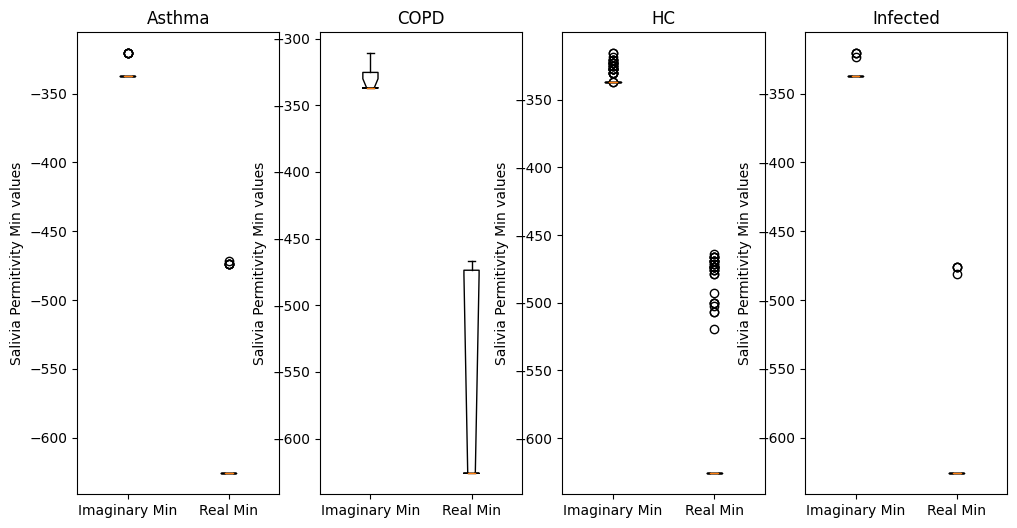

In [14]:
group4=df_clean_final.groupby('diagnosis')
fig, axs = plt.subplots(nrows=1, ncols=len(group4), figsize=(12,6))
for i, (name, group) in enumerate(group4):
    axs[i].boxplot([group['imaginary_min'],group['real_min']], labels=['Imaginary Min', 'Real Min'], notch=True, bootstrap=10000)
    axs[i].set_ylabel('Salivia Permitivity Min values')
    axs[i].set_title(name)

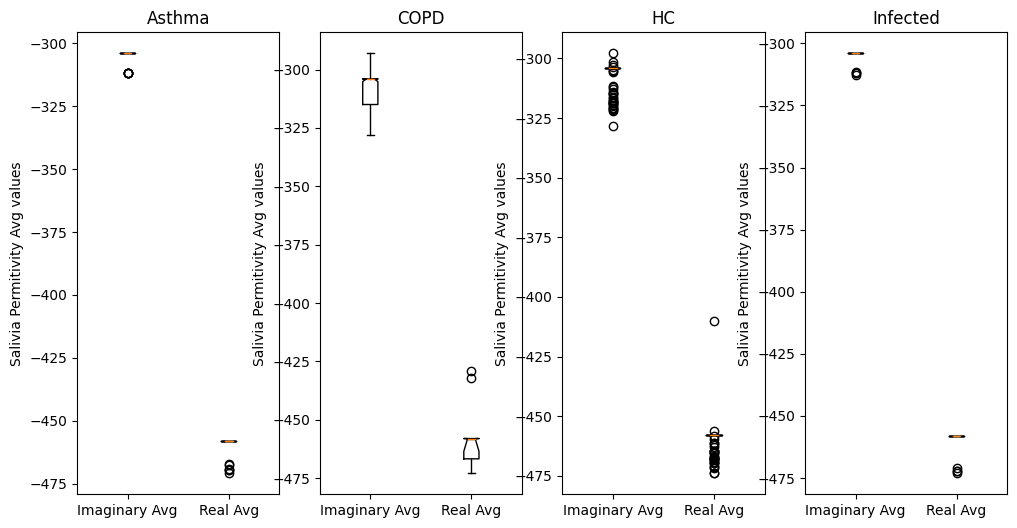

In [15]:
#create new Box plots comparing Real and Imaginary avg values in Salvia Permittivity data

fig, axs = plt.subplots(nrows=1, ncols=len(groups), figsize=(12,6))
for i, (name, group) in enumerate(group4):
    axs[i].boxplot([group['imaginary_avg'],group['real_avg']], labels=['Imaginary Avg', 'Real Avg'], notch=True, bootstrap=10000)
    axs[i].set_ylabel('Salivia Permitivity Avg values')
    axs[i].set_title(name)
    

Scatter plots

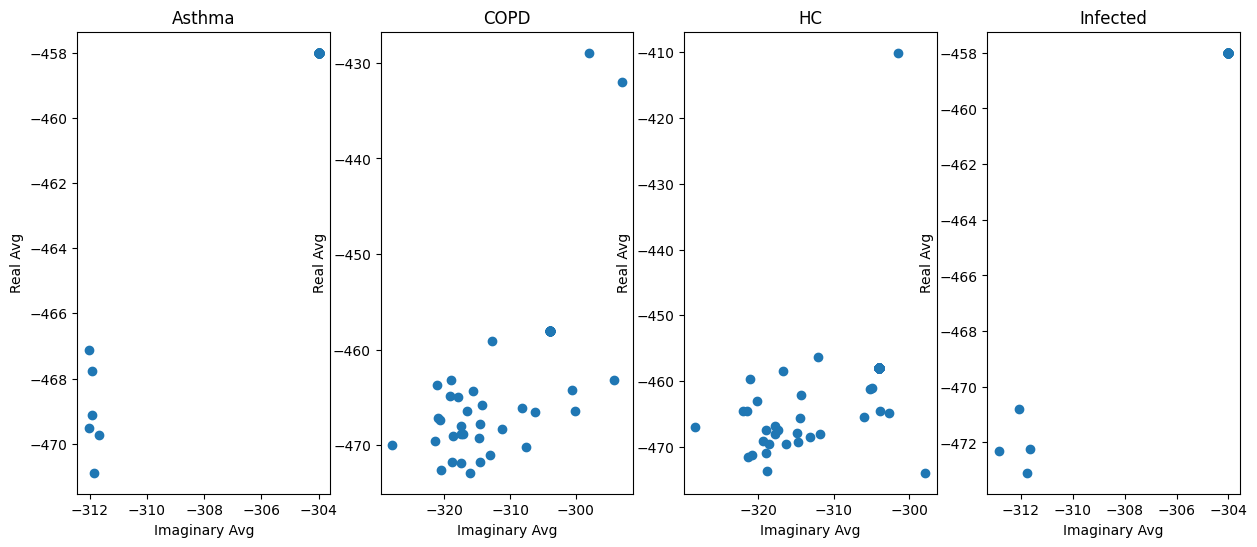

In [16]:
#create Scatter plot comparing Real and Imaginary avg values in Salvia Permittivity data

fig, axs = plt.subplots(nrows=1, ncols=len(groups), figsize=(15,6))
for i, (name, group) in enumerate(group4):
    axs[i].scatter(group['imaginary_avg'],group['real_avg'])
    axs[i].set_ylabel('Real Avg')
    axs[i].set_title(name)
    axs[i].set_xlabel('Imaginary Avg')

    

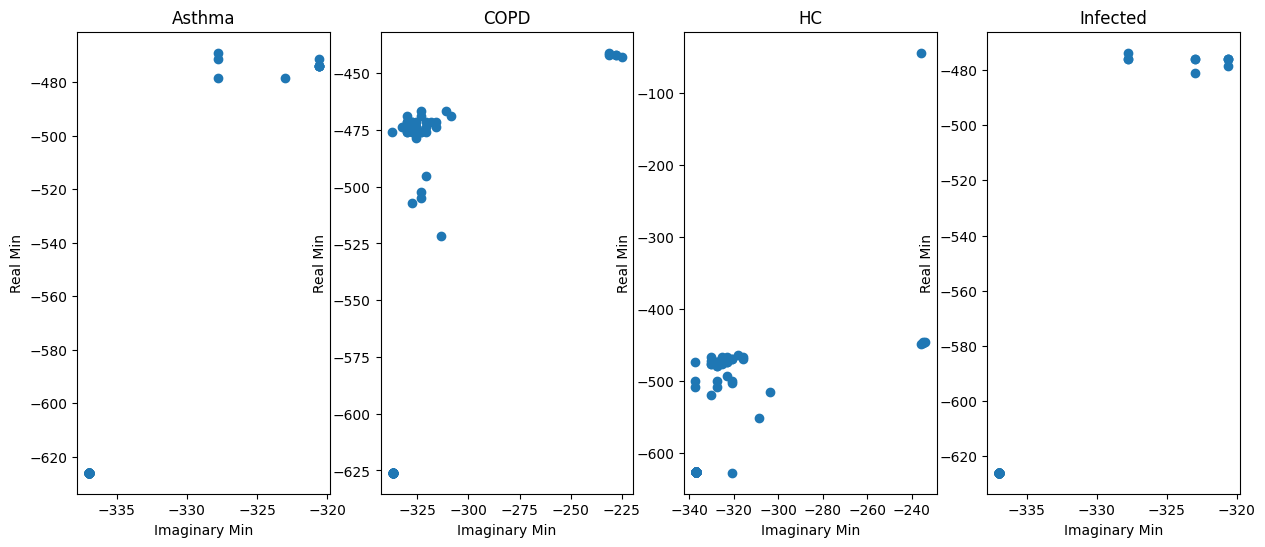

In [54]:
#create Scatter plot comparing Real and Imaginary Min values in Salvia Permittivity data

fig, axs = plt.subplots(nrows=1, ncols=len(groups), figsize=(15,6))
for i, (name, group) in enumerate(group4):
    axs[i].scatter(group['imaginary_min'],group['real_min'])
    axs[i].set_ylabel('Real Min')
    axs[i].set_title(name)
    axs[i].set_xlabel('Imaginary Min')

Charts

Bar Chart

In [55]:
# Bar chart for Average of Saliva Permitivity 

average_min = groups.mean()
print(average_min)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_4436\3845111999.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_min = groups.mean()


           imaginary_min  imaginary_avg    real_min    real_avg    gender  \
diagnosis                                                                   
Asthma       -335.250000    -305.214634 -606.966500 -459.346269  0.312500   
COPD         -324.481392    -303.027399 -548.619494 -459.034391  0.708861   
HC           -331.114813    -303.701293 -587.437250 -456.461817  0.350000   
Infected     -335.309750    -305.317819 -607.325000 -459.585720  0.275000   

                 age   smoking  
diagnosis                       
Asthma     55.375000  1.662500  
COPD       70.873418  2.050633  
HC         39.487500  1.618750  
Infected   38.737500  1.687500  


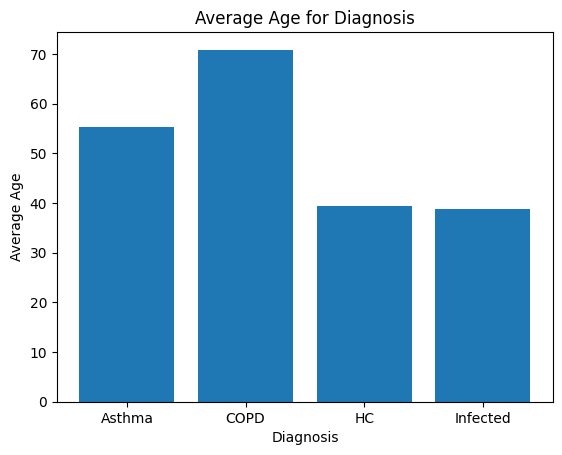

In [56]:
# create a bar chart of the average value for each group
plt.bar(average_min.index, average_min['age'])

# set the x-axis label and the title
plt.xlabel('Diagnosis')
plt.ylabel('Average Age')
plt.title('Average Age for Diagnosis')

# display the plot
plt.show()

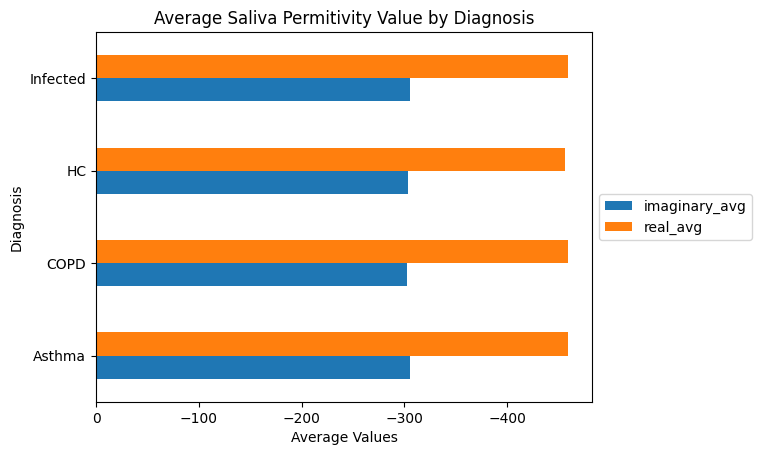

In [76]:

# Create a bar chart of the three columns
average_min[['imaginary_avg','real_avg']].plot(kind='barh')

# invert the y-axis to show the largest values at the top
plt.gca().invert_xaxis()

# set the x-axis label and the title
plt.xlabel('Average Values')
plt.ylabel('Diagnosis')
plt.title('Average Saliva Permitivity Value by Diagnosis')

# add a legend outside the chart area
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# display the plot
plt.show()

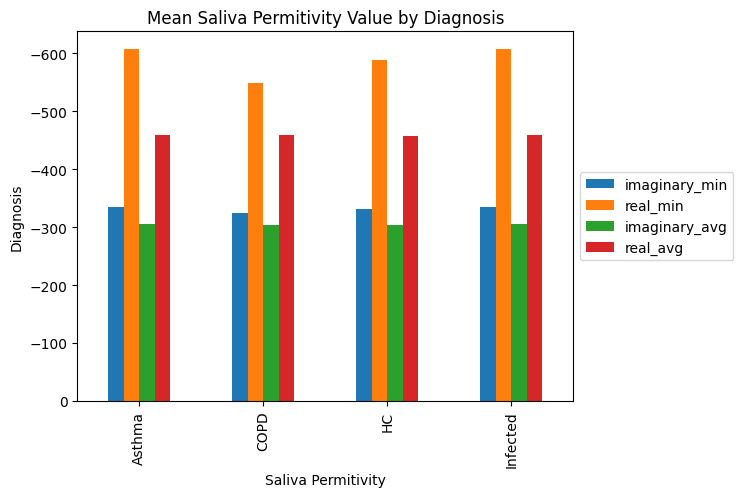

In [99]:

# Create a bar chart of the three columns
average_min[['imaginary_min','real_min','imaginary_avg','real_avg']].plot(kind='bar')

# invert the y-axis to show the largest values at the top
plt.gca().invert_yaxis()

# set the x-axis label and the title
plt.xlabel('Saliva Permitivity')
plt.ylabel('Diagnosis')
plt.title('Mean Saliva Permitivity Value by Diagnosis')

# add a legend outside the chart area
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# display the plot
plt.show()

Line Plot

<Axes: >

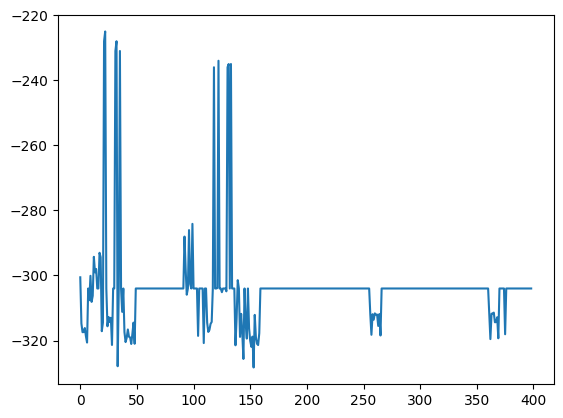

In [80]:
df['imaginary_avg'].plot.line()

Heat Map

<Axes: >

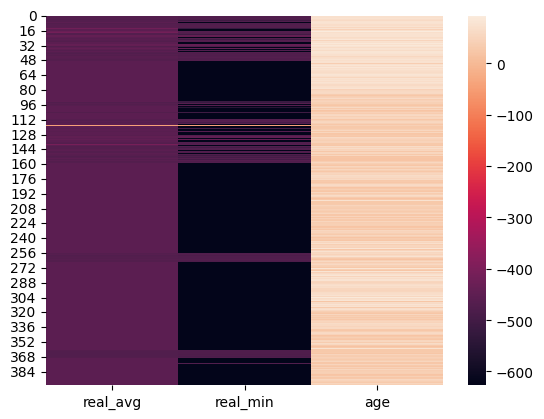

In [101]:
#Heat map

sns.heatmap(df[['real_avg','real_min','age']])

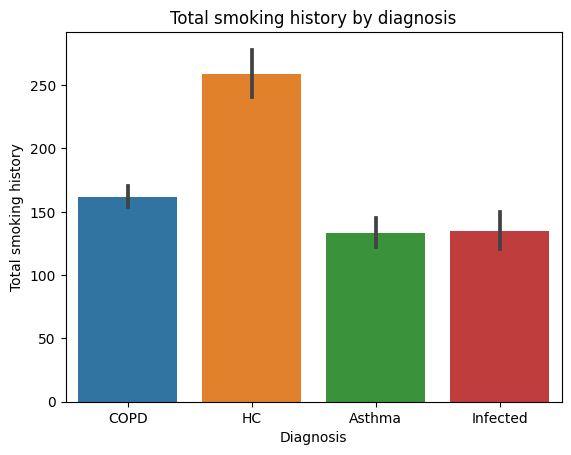

In [17]:
sns.barplot(data=df, x='diagnosis', y='smoking', estimator=sum)
plt.title('Total smoking history by diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Total smoking history')
plt.show()

This plot shows the total smoking history for patients who were diagnosed with lung cancer (Diagnosis = 1) and patients who were not diagnosed with lung cancer (Diagnosis = 0). We can see that patients who were diagnosed with lung cancer had a higher total smoking history on average than patients who were not diagnosed with lung cancer.

Finally, let's create a scatter plot to explore the relationship between age, smoking history, and lung cancer diagnosis:

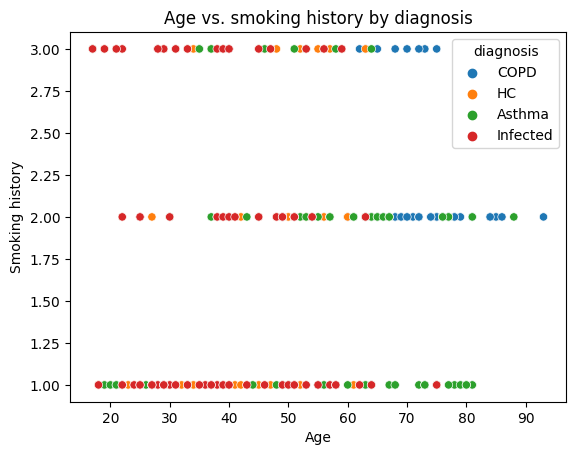

In [19]:
sns.scatterplot(data=df, x='age', y='smoking', hue='diagnosis')
plt.title('Age vs. smoking history by diagnosis')
plt.xlabel('Age')
plt.ylabel('Smoking history')
plt.show()


This plot shows the relationship between age, smoking history, and lung cancer diagnosis. We can see that patients who were diagnosed with lung cancer tend to be older and have a higher smoking history than patients who were not diagnosed with lung cancer.

In conclusion, we can see that smoking history is an important factor in lung cancer diagnosis, with patients who have a higher smoking history being more likely to be diagnosed with lung cancer. Additionally, age is also an important factor, with older patients being more likely to be diagnosed with lung cancer.